In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

- count len of sentences, words, text, paragraphs

In [2]:
with open("../data/raf.txt", 'r') as text:
    textfile = text.read()
#     print(textfile)

In [3]:
type(textfile)

str

In [7]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

tokenized_rafi = tokenizer.tokenize(textfile)

In [8]:
fdist = FreqDist(tokenized_rafi)
print(fdist)

<FreqDist with 2944 samples and 10531 outcomes>


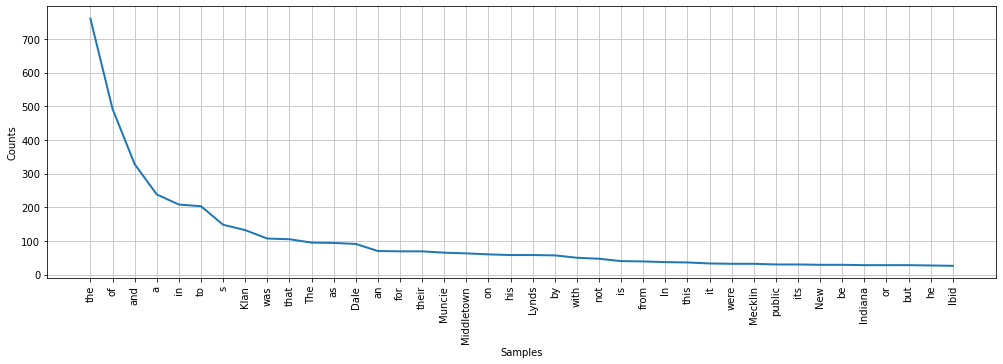

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
plt.figure(figsize=(17,5))
fdist.plot(40)

In [10]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'weren', 'to', 'my', 'so', 'now', 'having', 'those', 'too', 'hadn', 'was', 'some', "shouldn't", 'each', 'mightn', 'these', 'above', 'am', 'own', "shan't", "couldn't", 'are', 'a', 'be', 'he', 'me', 'then', "isn't", 'them', "should've", 'didn', 'ain', 'with', 'i', 'who', 'that', 'themselves', 'doesn', 'an', 'once', 'through', 'or', "didn't", 'shan', 'nor', 'should', 'his', "mustn't", 'did', 'shouldn', "hadn't", 'him', "you've", "don't", 'can', 'more', 'both', 'hers', 'when', 'himself', "haven't", "you'd", 'over', 'any', 'll', "doesn't", 'into', 'were', 'wouldn', 'aren', 'after', 'out', 'no', 'its', 'same', 'while', 'does', 'will', 'been', 'wasn', 've', 'd', "you're", 'y', 't', "won't", 'such', 're', 'how', 'yourselves', 'under', 'down', 'if', 'isn', 'couldn', "wasn't", 'at', 'of', 'itself', 'is', "you'll", 'doing', 'their', 'where', 'very', 'only', "that'll", 'here', 'being', "it's", 'just', 'ourselves', 'the', 's', 'haven', 'ma', 'until', 'it', 'which', 'your', 'myself', 'do', 'not', '

In [12]:
import string

#adding additional words I don't find to be that valuable
additional_stopwords = ['https', 'I', 'com', 'http', 'RT', 'co', 'the', 'amp', 'the', 'lt', 'A', 'www', 'rt', 'got', 'get', 
                        'ly', 'u', 'In', 'in', 'The', 'the', 'Ibid']

stop_words = stopwords.words('english')

stop_words += list(string.punctuation)

stop_words += additional_stopwords

In [13]:
filtered_rafi=[]
for w in tokenized_rafi:
    if w not in stop_words:
        filtered_rafi.append(w)
# print("Filterd Sentence:",filtered_review)

In [14]:
print(len(tokenized_rafi))
print(len(filtered_rafi))

10531
6312


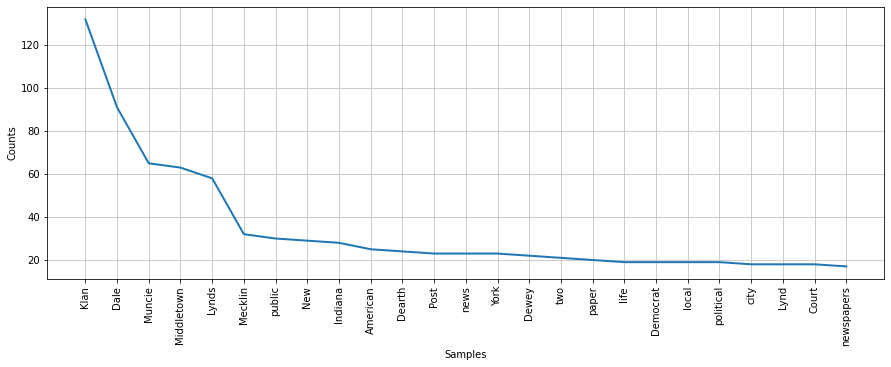

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
fdist = FreqDist(filtered_rafi)
plt.figure(figsize=(15,5))
fdist.plot(25)

In [16]:
fdist.most_common(25)

[('Klan', 132),
 ('Dale', 91),
 ('Muncie', 65),
 ('Middletown', 63),
 ('Lynds', 58),
 ('Mecklin', 32),
 ('public', 30),
 ('New', 29),
 ('Indiana', 28),
 ('American', 25),
 ('Dearth', 24),
 ('Post', 23),
 ('news', 23),
 ('York', 23),
 ('Dewey', 22),
 ('two', 21),
 ('paper', 20),
 ('life', 19),
 ('Democrat', 19),
 ('local', 19),
 ('political', 19),
 ('city', 18),
 ('Lynd', 18),
 ('Court', 18),
 ('newspapers', 17)]

In [103]:
fdist

FreqDist({'Klan': 132, 'Dale': 91, 'Muncie': 65, 'Middletown': 63, 'Lynds': 58, 'Mecklin': 32, 'public': 30, 'New': 29, 'Indiana': 28, 'American': 25, ...})

In [102]:
type(fdist)

nltk.probability.FreqDist

In [104]:
type(fdist.most_common(25))

list

In [75]:
# from fdist.most_common(25) seperate words and counts
rafi_words = [x[0] for x in fdist.most_common(25)]
print(rafi_words)
rafi_counts = [x[1] for x in fdist.most_common(25)]
print(rafi_counts)

['Klan', 'Dale', 'Muncie', 'Middletown', 'Lynds', 'Mecklin', 'public', 'New', 'Indiana', 'American', 'Dearth', 'Post', 'news', 'York', 'Dewey', 'two', 'paper', 'life', 'Democrat', 'local', 'political', 'city', 'Lynd', 'Court', 'newspapers']
[132, 91, 65, 63, 58, 32, 30, 29, 28, 25, 24, 23, 23, 23, 22, 21, 20, 19, 19, 19, 19, 18, 18, 18, 17]


In [88]:
#figured out how to slice from most common!
most_common_slice = fdist.most_common(100)
# x[26:60]

In [91]:
rafi_words = [x[0] for x in fdist.most_common()[26:60]]
print(rafi_words)
rafi_counts = [x[1] for x in fdist.most_common()[26:60]]
print(rafi_counts)

['Klux', 'business', 'town', 'George', 'Klansmen', '1927', 'social', 'one', 'Times', 'press', 'members', 'story', 'published', 'politics', 'new', '1920s', 'Robert', 'Supreme', 'journalism', 'class', 'March', 'small', 'court', '1926', 'corruption', 'study', 'democracy', 'As', 'people', 'church', 'Editor', 'Lippmann', 'editor', 'trial']
[17, 17, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 14, 14, 14, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11]


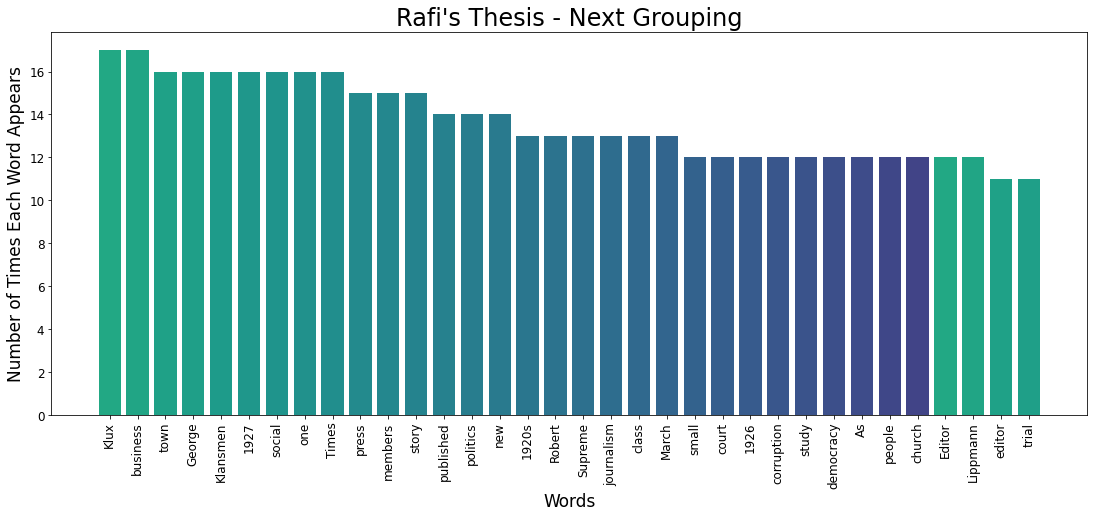

In [92]:
fig, ax = plt.subplots(1,1, figsize=(15,7))

# matplotlib bar plot
ax.bar(rafi_words, rafi_counts, color=cm.viridis_r(np.linspace(.4,.8, 30)))
plt.xticks(rotation=90)
plt.xlabel('Words', fontsize = 17)
plt.ylabel('Number of Times Each Word Appears', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Rafi's Thesis - Next Grouping", fontsize = 24)

plt.tight_layout(pad=0) #necessary - if not included extra text shows up

# plt.savefig('graphs/rafi.png')

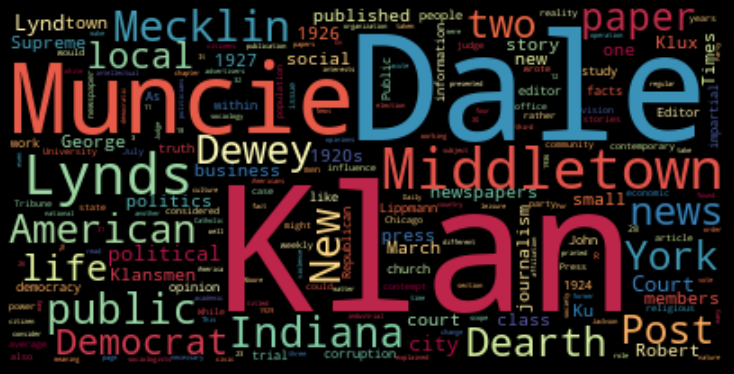

In [17]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fdist)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [19]:
# implementing it in python
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts

vec = CountVectorizer(stop_words=None)
X = vec.fit_transform([textfile])


df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df

,00,000,10,100,103,104,106,107,109,11,...,yields,york,yorker,you,young,your,youths,zeitgeist,œcommon,œcompact
0,1,3,4,2,1,2,1,2,1,5,...,1,23,2,1,4,1,1,1,1,1


In [20]:
pd.options.display.max_seq_items = None
# df.columns

In [21]:
df = df.transpose()

In [22]:
df.head()

,0
00,1
000,3
10,4
100,2
103,1


In [23]:
df = df.reset_index()

In [31]:
df = df.rename(columns={'index':'word', 0:'count'})

In [35]:
df_sort = df.sort_values(['count'], ascending=False)

In [36]:
df_sort = df_sort.reset_index(drop=True)

In [39]:
df_sort[25:70]

,word,count
25,from,39
26,public,39
27,its,33
28,were,32
29,court,29
30,or,29
31,be,29
32,news,29
33,he,28
34,indiana,28
